## Import doctor review dataset and gender dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = "/Users/chongchen/Desktop/19Fall RA/data/generated_data/Internal Medicine Review.csv"
review_im = pd.read_csv(path, index_col = 0)

In [3]:
review_im.head()

,Review,hp_id,gender,hasorder,lower,no_digits,no_punctuation,words
0,"satisfactory but would not recommend coldness,...",19713,F,0,"satisfactory but would not recommend coldness,...","satisfactory but would not recommend coldness,...",satisfactory but would not recommend coldness ...,"['satisfactory', 'recommend', 'coldness', 'sol..."
1,Although Dr. Merlo does not appear to have an...,19713,F,0,although dr. merlo does not appear to have an...,although dr. merlo does not appear to have an...,although dr merlo does not appear to have an...,"['although', 'dr', 'merlo', 'appear', 'office'..."
2,"took my daughter for problems, never examined...",19713,F,0,"took my daughter for problems, never examined...","took my daughter for problems, never examined...",took my daughter for problems never examined...,"['took', 'daughter', 'problems', 'never', 'exa..."
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713,F,0,"yes, dr. merlot can be rude and arrogant, but...","yes, dr. merlot can be rude and arrogant, but...",yes dr merlot can be rude and arrogant but...,"['yes', 'dr', 'merlot', 'rude', 'arrogant', 'o..."
4,I called to make and appointment and a woman ...,19713,F,0,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,"['called', 'make', 'appointment', 'woman', 'ca..."


In [4]:
# drop records without review
review_im.drop(review_im[review_im['Review'] == ' '].index, inplace = True)
review_im.reset_index(inplace = True, drop = True)

In [5]:
review_im['words'][0]

"['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo']"

In [6]:
import ast
review_im['words'] = review_im['words'].map(lambda x: ast.literal_eval(x))

In [7]:
review_im['words'][0]

['satisfactory',
 'recommend',
 'coldness',
 'solo',
 'helpfulness',
 'limited',
 'office',
 'staff',
 'isolation',
 'diagnosis',
 'solo']

In [8]:
review_im.head()

,Review,hp_id,gender,hasorder,lower,no_digits,no_punctuation,words
0,"satisfactory but would not recommend coldness,...",19713,F,0,"satisfactory but would not recommend coldness,...","satisfactory but would not recommend coldness,...",satisfactory but would not recommend coldness ...,"[satisfactory, recommend, coldness, solo, help..."
1,Although Dr. Merlo does not appear to have an...,19713,F,0,although dr. merlo does not appear to have an...,although dr. merlo does not appear to have an...,although dr merlo does not appear to have an...,"[although, dr, merlo, appear, office, staff, m..."
2,"took my daughter for problems, never examined...",19713,F,0,"took my daughter for problems, never examined...","took my daughter for problems, never examined...",took my daughter for problems never examined...,"[took, daughter, problems, never, examined, un..."
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713,F,0,"yes, dr. merlot can be rude and arrogant, but...","yes, dr. merlot can be rude and arrogant, but...",yes dr merlot can be rude and arrogant but...,"[yes, dr, merlot, rude, arrogant, one, gastroe..."
4,I called to make and appointment and a woman ...,19713,F,0,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,"[called, make, appointment, woman, calling, ma..."


#### Add lable to the review based on gender & sanction

In [9]:
review_im['label']=0

In [10]:
review_im['label'][np.logical_and(review_im['gender']=='F',review_im['hasorder']==0)] = 'F0'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
review_im['label'][np.logical_and(review_im['gender']=='M',review_im['hasorder']==0)] = 'M0'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
review_im['label'][np.logical_and(review_im['gender']=='F',review_im['hasorder']==1)] = 'F1'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
review_im['label'][np.logical_and(review_im['gender']=='M',review_im['hasorder']==1)] = 'M1'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
review_im

,Review,hp_id,gender,hasorder,lower,no_digits,no_punctuation,words,label
0,"satisfactory but would not recommend coldness,...",19713,F,0,"satisfactory but would not recommend coldness,...","satisfactory but would not recommend coldness,...",satisfactory but would not recommend coldness ...,"[satisfactory, recommend, coldness, solo, help...",F0
1,Although Dr. Merlo does not appear to have an...,19713,F,0,although dr. merlo does not appear to have an...,although dr. merlo does not appear to have an...,although dr merlo does not appear to have an...,"[although, dr, merlo, appear, office, staff, m...",F0
2,"took my daughter for problems, never examined...",19713,F,0,"took my daughter for problems, never examined...","took my daughter for problems, never examined...",took my daughter for problems never examined...,"[took, daughter, problems, never, examined, un...",F0
3,"Yes, Dr. Merlot can be rude and arrogant, but...",19713,F,0,"yes, dr. merlot can be rude and arrogant, but...","yes, dr. merlot can be rude and arrogant, but...",yes dr merlot can be rude and arrogant but...,"[yes, dr, merlot, rude, arrogant, one, gastroe...",F0
4,I called to make and appointment and a woman ...,19713,F,0,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,i called to make and appointment and a woman ...,"[called, make, appointment, woman, calling, ma...",F0
5,"I, unfortunately,treated with Dr.Merlo severa...",19713,F,0,"i, unfortunately,treated with dr.merlo severa...","i, unfortunately,treated with dr.merlo severa...",i unfortunately treated with dr merlo severa...,"[unfortunately, treated, dr, merlo, several, y...",F0
6,I can't tell you if she's a good or bad docto...,19713,F,0,i can't tell you if she's a good or bad docto...,i can't tell you if she's a good or bad docto...,i can t tell you if she s a good or bad docto...,"[tell, good, bad, doctor, anything, prove, one...",F0
7,Yesterday my partner had an upper endoscopy d...,19713,F,0,yesterday my partner had an upper endoscopy d...,yesterday my partner had an upper endoscopy d...,yesterday my partner had an upper endoscopy d...,"[yesterday, partner, upper, endoscopy, done, d...",F0
8,Very arrogant and rude. Went in with a previo...,19713,F,0,very arrogant and rude. went in with a previo...,very arrogant and rude. went in with a previo...,very arrogant and rude went in with a previo...,"[arrogant, rude, went, previously, diagnosed, ...",F0
9,She files insurance for me even though I have...,19713,F,0,she files insurance for me even though i have...,she files insurance for me even though i have...,she files insurance for me even though i have...,"[files, insurance, even, though, traditional, ...",F0


In [15]:
from gensim.models import Word2Vec

In [16]:
# preparing corpus
documents = list(review_im['words'])

In [17]:
import numpy as np

In [18]:
np.mean([len(i) for i in documents])

23.603743954480798

In [19]:
max([len(i) for i in documents])

143

In [20]:
min([len(i) for i in documents])

0

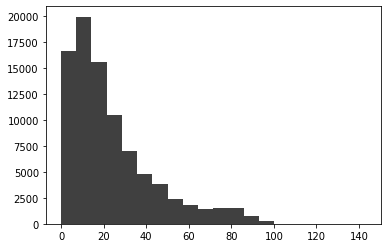

In [21]:
plt.hist([len(i) for i in documents], bins = 20, color = '0.25');

In [ ]:
# sentences=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, 
# sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, 
# hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, 
# batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None

### Hyperparameter setting 1

In [79]:
w2v = Word2Vec(size=300,window=30,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166350369, 207417900)

In [80]:
w2v.save("w2v_1.model")

In [81]:
w2v_1= Word2Vec.load("w2v_1.model")

In [82]:
w2v_1.wv.most_similar(positive=["dr"])

[('doctor', 0.45916932821273804),
 ('physician', 0.33714205026626587),
 ('always', 0.2492298185825348),
 ('doctors', 0.2401164174079895),
 ('internist', 0.23528248071670532),
 ('wonderful', 0.23021069169044495),
 ('cardiologist', 0.22314128279685974),
 ('rheumatologist', 0.2222317010164261),
 ('recently', 0.22099417448043823),
 ('ago', 0.2200728952884674)]

In [83]:
w2v_1.wv.most_similar(positive=["wonderful"])

[('great', 0.6361227035522461),
 ('excellent', 0.5709502696990967),
 ('amazing', 0.5621974468231201),
 ('fantastic', 0.5557445287704468),
 ('best', 0.4370362460613251),
 ('outstanding', 0.43186086416244507),
 ('kind', 0.429627001285553),
 ('love', 0.42594581842422485),
 ('awesome', 0.3962565064430237),
 ('caring', 0.3905869722366333)]

In [84]:
w2v_1.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.8639764189720154),
 ('knowlegable', 0.4975564479827881),
 ('knowlegeable', 0.4936981797218323),
 ('intelligent', 0.46479690074920654),
 ('competent', 0.4060893654823303),
 ('knowledgeble', 0.3753508925437927),
 ('smart', 0.3406170904636383),
 ('informative', 0.3226452171802521),
 ('knowledge', 0.3130270838737488),
 ('knowledable', 0.2818285822868347)]

In [85]:
w2v_1.wv.most_similar(positive=["caring"])

[('compassionate', 0.40445759892463684),
 ('kind', 0.4009045958518982),
 ('wonderful', 0.3905869722366333),
 ('best', 0.37096530199050903),
 ('excellent', 0.35342130064964294),
 ('amazing', 0.3525526821613312),
 ('cares', 0.3460041880607605),
 ('dedicated', 0.3346731662750244),
 ('always', 0.3220123052597046),
 ('outstanding', 0.30643635988235474)]

In [86]:
w2v_1.wv.most_similar(positive=["rude"])

[('unprofessional', 0.4293363094329834),
 ('unfriendly', 0.4199191927909851),
 ('rudest', 0.4091644883155823),
 ('awful', 0.3667820692062378),
 ('horrible', 0.36254388093948364),
 ('nasty', 0.35845163464546204),
 ('office', 0.32227760553359985),
 ('incompetent', 0.30878907442092896),
 ('worst', 0.3026098608970642),
 ('unhelpful', 0.3024693727493286)]

In [116]:
w2v_1.wv.most_similar(positive=["unprofessional"])

[('rude', 0.4293363690376282),
 ('worst', 0.3758218288421631),
 ('incompetent', 0.3755025267601013),
 ('unhelpful', 0.34632599353790283),
 ('disrespectful', 0.3126639127731323),
 ('poor', 0.30223900079727173),
 ('nasty', 0.3002842664718628),
 ('horrible', 0.2993791103363037),
 ('office', 0.29850995540618896),
 ('inappropriate', 0.2938278019428253)]

In [113]:
w2v_1.wv.most_similar(positive=["staff"])

[('receptionist', 0.4538799524307251),
 ('office', 0.4468477666378021),
 ('manager', 0.42484891414642334),
 ('nurses', 0.386435329914093),
 ('receptionists', 0.36470848321914673),
 ('girls', 0.31627127528190613),
 ('staffs', 0.3086164593696594),
 ('personnel', 0.30408576130867004),
 ('employees', 0.2974265515804291),
 ('nurse', 0.28877168893814087)]

### Hyperparameter setting 2 ( decrease window size from 30 to 20, holding the rest of the parameters constant)

In [87]:
w2v = Word2Vec(size=300,window=20,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166346723, 207417900)

In [88]:
w2v.save("w2v_2.model")

In [89]:
w2v_2= Word2Vec.load("w2v_2.model")

In [90]:
w2v_2.wv.most_similar(positive=["dr"])

[('doctor', 0.499885618686676),
 ('physician', 0.35943397879600525),
 ('caring', 0.27351146936416626),
 ('wonderful', 0.2715435326099396),
 ('doctors', 0.27112939953804016),
 ('internist', 0.26683175563812256),
 ('attentive', 0.24752208590507507),
 ('years', 0.24271419644355774),
 ('always', 0.23127396404743195),
 ('md', 0.2300117462873459)]

In [91]:
w2v_2.wv.most_similar(positive=["wonderful"])

[('great', 0.6676573753356934),
 ('fantastic', 0.6039437651634216),
 ('amazing', 0.5864121317863464),
 ('excellent', 0.5819053649902344),
 ('outstanding', 0.4711351990699768),
 ('love', 0.4596397578716278),
 ('awesome', 0.45512598752975464),
 ('best', 0.44739729166030884),
 ('kind', 0.43495920300483704),
 ('caring', 0.40091031789779663)]

In [92]:
w2v_2.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.872672438621521),
 ('knowlegeable', 0.5337325930595398),
 ('knowlegable', 0.5008127689361572),
 ('intelligent', 0.49439045786857605),
 ('competent', 0.4410247206687927),
 ('knowledgeble', 0.4326866567134857),
 ('smart', 0.372468501329422),
 ('informative', 0.33169686794281006),
 ('knowledge', 0.3290414810180664),
 ('always', 0.31108731031417847)]

In [93]:
w2v_2.wv.most_similar(positive=["caring"])

[('compassionate', 0.45195484161376953),
 ('kind', 0.439325213432312),
 ('wonderful', 0.400910347700119),
 ('excellent', 0.39074063301086426),
 ('best', 0.37418651580810547),
 ('cares', 0.3703380823135376),
 ('amazing', 0.3685465455055237),
 ('personable', 0.35715487599372864),
 ('outstanding', 0.3332512378692627),
 ('always', 0.3301669657230377)]

In [94]:
w2v_2.wv.most_similar(positive=["rude"])

[('unfriendly', 0.4604812264442444),
 ('unprofessional', 0.46043726801872253),
 ('rudest', 0.4293581247329712),
 ('nasty', 0.4158737063407898),
 ('horrible', 0.38154932856559753),
 ('awful', 0.3784559667110443),
 ('cold', 0.34814268350601196),
 ('incompetent', 0.3295789361000061),
 ('office', 0.3293423354625702),
 ('worst', 0.325403094291687)]

In [115]:
w2v_2.wv.most_similar(positive=["unprofessional"])

[('rude', 0.46043726801872253),
 ('incompetent', 0.37825608253479004),
 ('worst', 0.36913442611694336),
 ('unhelpful', 0.3389741778373718),
 ('horrible', 0.3248497247695923),
 ('hung', 0.31699997186660767),
 ('disrespectful', 0.30897754430770874),
 ('arrogant', 0.3069496750831604),
 ('inappropriate', 0.30423203110694885),
 ('unacceptable', 0.3038337826728821)]

In [112]:
w2v_2.wv.most_similar(positive=["staff"])

[('receptionist', 0.47950059175491333),
 ('office', 0.44798043370246887),
 ('manager', 0.42761117219924927),
 ('nurses', 0.426509827375412),
 ('receptionists', 0.3992658257484436),
 ('employees', 0.3421250581741333),
 ('staffs', 0.3243516683578491),
 ('girls', 0.3224979043006897),
 ('assistants', 0.31105226278305054),
 ('unorganized', 0.3098085820674896)]

### Hyperparameter setting 3 ( increase window size to 40, holding the rest of the parameters constant)

In [95]:
w2v = Word2Vec(size=300,window=40,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166356147, 207417900)

In [96]:
w2v.save("w2v_3.model")

In [97]:
w2v_3= Word2Vec.load("w2v_3.model")

In [98]:
w2v_3.wv.most_similar(positive=["dr"])

[('doctor', 0.42630183696746826),
 ('physician', 0.31893548369407654),
 ('doctors', 0.2616861164569855),
 ('grateful', 0.24166131019592285),
 ('always', 0.2322029173374176),
 ('drs', 0.2282935380935669),
 ('wonderful', 0.2188992202281952),
 ('immediately', 0.21527288854122162),
 ('internist', 0.208210289478302),
 ('years', 0.206084743142128)]

In [99]:
w2v_3.wv.most_similar(positive=["wonderful"])

[('great', 0.6171221733093262),
 ('amazing', 0.5562236309051514),
 ('excellent', 0.5461385846138),
 ('fantastic', 0.538554310798645),
 ('best', 0.43518808484077454),
 ('love', 0.41388916969299316),
 ('outstanding', 0.40590786933898926),
 ('awesome', 0.4016324579715729),
 ('kind', 0.39836710691452026),
 ('caring', 0.3855302631855011)]

In [100]:
w2v_3.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.8495000004768372),
 ('knowlegeable', 0.450377881526947),
 ('knowlegable', 0.4472546875476837),
 ('intelligent', 0.4406425356864929),
 ('competent', 0.3907619118690491),
 ('knowledgeble', 0.3601892590522766),
 ('smart', 0.32877317070961),
 ('informative', 0.3192101716995239),
 ('knowledge', 0.30176621675491333),
 ('always', 0.2606216073036194)]

In [101]:
w2v_3.wv.most_similar(positive=["caring"])

[('wonderful', 0.3855302631855011),
 ('compassionate', 0.3853279948234558),
 ('kind', 0.3682704269886017),
 ('best', 0.3529529571533203),
 ('always', 0.3463168144226074),
 ('cares', 0.33644816279411316),
 ('excellent', 0.3299354910850525),
 ('amazing', 0.3298393189907074),
 ('outstanding', 0.289012610912323),
 ('dedicated', 0.2821180820465088)]

In [102]:
w2v_3.wv.most_similar(positive=["rude"])

[('unprofessional', 0.4077616333961487),
 ('rudest', 0.38368290662765503),
 ('awful', 0.3594316244125366),
 ('nasty', 0.34824907779693604),
 ('unfriendly', 0.3460191786289215),
 ('horrible', 0.3386519253253937),
 ('office', 0.30691030621528625),
 ('worst', 0.29962262511253357),
 ('unhelpful', 0.2923283278942108),
 ('told', 0.2854226231575012)]

In [114]:
w2v_3.wv.most_similar(positive=["unprofessional"])

[('rude', 0.4077616333961487),
 ('worst', 0.3490385413169861),
 ('incompetent', 0.3211132884025574),
 ('office', 0.3169613182544708),
 ('disrespectful', 0.3127964735031128),
 ('inappropriate', 0.296947717666626),
 ('horrible', 0.2877311110496521),
 ('unhelpful', 0.2872677445411682),
 ('nasty', 0.28635454177856445),
 ('poor', 0.2732802629470825)]

In [111]:
w2v_3.wv.most_similar(positive=["staff"])

[('office', 0.4596254825592041),
 ('receptionist', 0.4453253149986267),
 ('manager', 0.41683048009872437),
 ('nurses', 0.3822271525859833),
 ('receptionists', 0.347592294216156),
 ('service', 0.3028676509857178),
 ('staffs', 0.3011287748813629),
 ('employees', 0.297333300113678),
 ('billing', 0.29284152388572693),
 ('girls', 0.2866860330104828)]

### Hyperparameter setting 4 ( change the window size to 35, holding the rest of the parameters constant)

In [72]:
w2v = Word2Vec(size=300,window=35,min_count=30,workers=4,hs=0, negative=7)
w2v.build_vocab(documents)
w2v.train(documents, total_examples=w2v.corpus_count,epochs=100)

(166354457, 207417900)

In [78]:
w2v.save("w2v_4.model")

In [103]:
w2v_4= Word2Vec.load("w2v_4.model")

In [104]:
w2v_4.wv.most_similar(positive=["dr"])

[('doctor', 0.4137003421783447),
 ('physician', 0.3113670349121094),
 ('always', 0.2740619480609894),
 ('doctors', 0.25287771224975586),
 ('recently', 0.23316174745559692),
 ('wonderful', 0.22798559069633484),
 ('internist', 0.22430753707885742),
 ('happy', 0.22162382304668427),
 ('attentive', 0.21890303492546082),
 ('pleased', 0.21853145956993103)]

In [105]:
w2v_4.wv.most_similar(positive=["wonderful"])

[('great', 0.6200506687164307),
 ('fantastic', 0.5493857860565186),
 ('excellent', 0.5458062291145325),
 ('amazing', 0.5314452052116394),
 ('best', 0.438632607460022),
 ('kind', 0.4210386276245117),
 ('outstanding', 0.4168912172317505),
 ('awesome', 0.41104668378829956),
 ('love', 0.408115953207016),
 ('caring', 0.388559490442276)]

In [106]:
w2v_4.wv.most_similar(positive=["knowledgeable"])

[('knowledgable', 0.8596457242965698),
 ('knowlegeable', 0.483573317527771),
 ('knowlegable', 0.47059398889541626),
 ('intelligent', 0.43237441778182983),
 ('competent', 0.39518097043037415),
 ('knowledgeble', 0.38079333305358887),
 ('smart', 0.3555871248245239),
 ('knowledge', 0.29687124490737915),
 ('always', 0.28782323002815247),
 ('informative', 0.2796274423599243)]

In [107]:
w2v_4.wv.most_similar(positive=["caring"])

[('kind', 0.41506582498550415),
 ('compassionate', 0.3977191150188446),
 ('wonderful', 0.388559490442276),
 ('best', 0.36833930015563965),
 ('excellent', 0.3447863459587097),
 ('amazing', 0.34190112352371216),
 ('cares', 0.3362942337989807),
 ('always', 0.3321238160133362),
 ('dedicated', 0.30629539489746094),
 ('personable', 0.30174383521080017)]

In [108]:
w2v_4.wv.most_similar(positive=["rude"])

[('unprofessional', 0.4353541135787964),
 ('unfriendly', 0.40955424308776855),
 ('rudest', 0.4000231623649597),
 ('awful', 0.36272478103637695),
 ('nasty', 0.3527188301086426),
 ('horrible', 0.34923985600471497),
 ('office', 0.3192899227142334),
 ('rudely', 0.3074188530445099),
 ('cold', 0.2972487807273865),
 ('unhelpful', 0.2953112721443176)]

In [109]:
w2v_4.wv.most_similar(positive=["unprofessional"])

[('rude', 0.4353541135787964),
 ('worst', 0.3636912703514099),
 ('incompetent', 0.33620721101760864),
 ('office', 0.3111066222190857),
 ('nasty', 0.3103058934211731),
 ('horrible', 0.31019556522369385),
 ('poor', 0.309330552816391),
 ('unhelpful', 0.29595911502838135),
 ('disrespectful', 0.29430824518203735),
 ('unacceptable', 0.29147595167160034)]

In [110]:
w2v_4.wv.most_similar(positive=["staff"])

[('office', 0.4611814022064209),
 ('receptionist', 0.4251977205276489),
 ('manager', 0.4200279116630554),
 ('nurses', 0.3813477158546448),
 ('receptionists', 0.3339008688926697),
 ('employees', 0.3162460923194885),
 ('personnel', 0.2974974513053894),
 ('staffs', 0.296334445476532),
 ('girls', 0.29333484172821045),
 ('service', 0.29294687509536743)]

### Run Doc2vec - gender

In [22]:
documents[0][0]

'satisfactory'

In [23]:
gender = list(review_im['gender'])
hasorder = list(review_im['hasorder'])

In [24]:
len(documents),len(gender),len(hasorder)

(87875, 87875, 87875)

In [25]:
# Tag document
import gensim
docs = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs.append(gensim.models.doc2vec.TaggedDocument(documents[i], [gender[i]]))

In [26]:
docs[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=['F'])

In [27]:
docs_for_vocab = [] 
for i in docs:
    docs_for_vocab.append(i)

In [28]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
import multiprocessing

In [133]:
model = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model.build_vocab(docs_for_vocab)
model.train(documents = docs,total_examples=model.corpus_count,epochs=100)

In [134]:
model.save("d2v_g1.model")

In [29]:
d2v_g1= Doc2Vec.load("d2v_g1.model")

In [31]:
d2v_g1.wv.most_similar(positive = [d2v_g1.docvecs['F']],topn=15)

[('dr', 0.7431488633155823),
 ('doctor', 0.7271621227264404),
 ('caring', 0.6368781328201294),
 ('staff', 0.6312354803085327),
 ('office', 0.6301532983779907),
 ('extremely', 0.629963755607605),
 ('time', 0.6232239007949829),
 ('really', 0.6171454787254333),
 ('knowledgeable', 0.6163986921310425),
 ('always', 0.6149625778198242),
 ('patient', 0.6130982637405396),
 ('never', 0.6121476888656616),
 ('kind', 0.610569179058075),
 ('see', 0.6052374839782715),
 ('friendly', 0.5981082916259766)]

In [32]:
d2v_g1.wv.most_similar(positive = [d2v_g1.docvecs['M']],topn=15)

[('dr', 0.8281524181365967),
 ('doctor', 0.8166409134864807),
 ('kind', 0.7272549271583557),
 ('patient', 0.7099394202232361),
 ('caring', 0.7075568437576294),
 ('extremely', 0.6939889788627625),
 ('great', 0.6927266120910645),
 ('well', 0.6783657073974609),
 ('good', 0.6746696829795837),
 ('one', 0.6743701696395874),
 ('time', 0.6675636768341064),
 ('helpful', 0.6650533676147461),
 ('knowledgeable', 0.6624915599822998),
 ('professional', 0.661713719367981),
 ('excellent', 0.6578822135925293)]

### Write a function to output the comparison results

In [115]:
# for consistency, we assign female words to list1 and male words to list2
def compare(list1,list2):
    ### list1 & list2 are the results from doc2vec.wv.most_similar() ###
    # convert similar words to dataframe
    list1={x:y for (x,y) in list1}
    list1=pd.DataFrame.from_dict(list1,orient='index')
    list1.reset_index(inplace= True)
    list1.rename(columns= {'index':'words',0:'similarity_score_f'},inplace= True)
    
    # convert similar words in list2 to dataframe
    list2={x:y for (x,y) in list2}
    list2=pd.DataFrame.from_dict(list2,orient='index')
    list2.reset_index(inplace= True)
    list2.rename(columns= {'index':'words',0:'similarity_score_m'},inplace= True)
    
    # left join list1 with list2, find words didn't appear in list2 but in list1
    l1 = pd.merge(list1,list2,on = 'words', how = 'left')
    l1_result = l1[['words','similarity_score_f']][l1['similarity_score_m'].isnull()].sort_values(by = 'similarity_score_f', ascending= False)
    print('In F not in M: Words related with female doctors but didn\'t appear in male doctor\'s reviews','\n')
    print(l1_result,'\n')

    # left join male words with female words, find words didn't appear in female but in male
    l2 = pd.merge(list1,list2,on = 'words', how = 'right')
    l2_result = l2[['words','similarity_score_m']][l2['similarity_score_f'].isnull()].sort_values(by = 'similarity_score_m', ascending= False)
    print('In M not in F: Words related with male doctors but didn\'t appear in female doctor\'s reviews','\n')
    print(l2_result,'\n')
    
    
    # related with both
    similar_words = pd.merge(list1,list2,on = 'words', how = 'inner')
    similar_words['diff']=similar_words['similarity_score_m']-similar_words['similarity_score_f']
    similar_words['label'] = similar_words['diff'].map(lambda x: 'F' if x < 0 else 'M')
    similar_words['abs_diff'] = similar_words['diff'].map(lambda x: abs(x))

    # M>F
    m = similar_words[['words','abs_diff']][similar_words['label']=='M'].sort_values(by ='abs_diff', ascending = False)
    # F>M
    f = similar_words[['words','abs_diff']][similar_words['label']=='F'].sort_values(by ='abs_diff', ascending = False)
    
    print('M>F: Similarity score of male doctors higher then that of female doctors','\n')
    print(m,'\n')
    print('F>M: Similarity score of female doctors higher then that of male doctors','\n')
    print(f,'\n')

### Similar words comparison results - gender

In [118]:
f = d2v_g1.wv.most_similar(positive = [d2v_g1.docvecs['F']],topn=500)
m = d2v_g1.wv.most_similar(positive = [d2v_g1.docvecs['M']],topn=500)
compare(list1=f,list2=m)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

               words  similarity_score_f
168            woman            0.434640
186     receptionist            0.424188
191        assistant            0.422763
193              pcp            0.422260
200        listening            0.418194
219         physical            0.411748
243       supportive            0.406395
246  endocrinologist            0.404932
274              lab            0.397253
276        generally            0.396978
278             appt            0.395862
287        attention            0.392793
297         comments            0.388736
298       unfriendly            0.388406
299           change            0.388234
300               pa            0.387965
303          history            0.387647
304            moved            0.387520
316          rushing            0.385108
334             half            0.381241
335           asking            0.381069
343 

### Run Doc2vec - gender & sanction

In [144]:
# Tag document
import gensim
docs_gs = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs_gs.append(gensim.models.doc2vec.TaggedDocument(documents[i],  [hasorder[i],gender[i]]))

In [145]:
docs_gs[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=[0, 'F'])

In [146]:
docs_for_vocab_gs = [] 
for i in docs_gs:
    docs_for_vocab_gs.append(i)

In [147]:
model_gs = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_gs.build_vocab(docs_for_vocab_gs)
model_gs.train(documents = docs_gs,total_examples=model_gs.corpus_count,epochs=100)

In [148]:
model_gs.save("d2v_gs1.model")

In [97]:
d2v_gs1= Doc2Vec.load("d2v_gs1.model")

In [98]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[0],d2v_gs1.docvecs['F']],topn=15)

[('dr', 0.8382483124732971),
 ('doctor', 0.8094700574874878),
 ('caring', 0.7179374694824219),
 ('patient', 0.7118537425994873),
 ('kind', 0.7015848159790039),
 ('extremely', 0.6905013918876648),
 ('time', 0.6878834366798401),
 ('staff', 0.6851698756217957),
 ('knowledgeable', 0.6844163537025452),
 ('always', 0.6755608320236206),
 ('never', 0.6683287620544434),
 ('really', 0.6661325097084045),
 ('office', 0.6633327007293701),
 ('helpful', 0.6618456840515137),
 ('great', 0.6505095362663269)]

In [99]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[0],d2v_gs1.docvecs['M']],topn=15)

[('dr', 0.8472877740859985),
 ('doctor', 0.8312726020812988),
 ('patient', 0.7375615835189819),
 ('caring', 0.7362607717514038),
 ('kind', 0.7360689640045166),
 ('great', 0.7048937082290649),
 ('extremely', 0.70399010181427),
 ('knowledgeable', 0.6948617100715637),
 ('good', 0.6827594041824341),
 ('time', 0.6805500984191895),
 ('professional', 0.679201066493988),
 ('one', 0.6737104654312134),
 ('staff', 0.6704651713371277),
 ('excellent', 0.6696045398712158),
 ('always', 0.6638321876525879)]

In [111]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1],d2v_gs1.docvecs['F']],topn=15)

[('doctor', 0.5625770092010498),
 ('dr', 0.5559017658233643),
 ('always', 0.5051372647285461),
 ('staff', 0.4993571639060974),
 ('office', 0.48801589012145996),
 ('caring', 0.48241108655929565),
 ('never', 0.47603607177734375),
 ('time', 0.4671357274055481),
 ('kind', 0.4612017869949341),
 ('patient', 0.46081849932670593),
 ('one', 0.46024295687675476),
 ('see', 0.4597282111644745),
 ('well', 0.45818468928337097),
 ('patients', 0.45670783519744873),
 ('helpful', 0.4463525414466858)]

In [112]:
d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1],d2v_gs1.docvecs['M']],topn=15)

[('doctor', 0.5769614577293396),
 ('dr', 0.5612245202064514),
 ('always', 0.49770617485046387),
 ('caring', 0.49418675899505615),
 ('staff', 0.489698588848114),
 ('kind', 0.483650267124176),
 ('well', 0.4821067154407501),
 ('patient', 0.4772361218929291),
 ('one', 0.4758063554763794),
 ('office', 0.4652448296546936),
 ('patients', 0.4650103449821472),
 ('never', 0.4641687870025635),
 ('time', 0.461802214384079),
 ('care', 0.45553481578826904),
 ('great', 0.44906601309776306)]

### Similar words comparison results -gender & not sanctioned

In [117]:
nsf = d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[0],d2v_gs1.docvecs['F']],topn=500)
nsm = d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[0],d2v_gs1.docvecs['M']],topn=500)
compare(list1=nsf,list2=nsm)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

             words  similarity_score_f
250            pcp            0.439544
260      listening            0.435955
274          woman            0.433994
326      assistant            0.421973
353          moved            0.412843
354   receptionist            0.412795
367        history            0.408655
384         trying            0.404125
385         wanted            0.404087
396       physical            0.400893
401      generally            0.399267
405            lab            0.397974
408          order            0.397878
417        finding            0.395928
419           exam            0.395259
422           appt            0.394773
424         seemed            0.394221
425   disappointed            0.393965
431    appropriate            0.392656
432         change            0.392523
435       negative            0.390308
438      remembers            0.389884
440      

### Similar words comparison results -gender & sanctioned

In [116]:
sf = d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1],d2v_gs1.docvecs['F']],topn=500)
sm = d2v_gs1.wv.most_similar(positive = [d2v_gs1.docvecs[1],d2v_gs1.docvecs['M']],topn=500)
compare(list1=sf,list2=sm)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

              words  similarity_score_f
277       listening            0.299232
294           woman            0.295252
295              pa            0.294961
310            lady            0.292004
311      unfriendly            0.291435
316       remembers            0.290402
326        physical            0.288599
327           waits            0.288242
346    receptionist            0.283865
353    practitioner            0.281889
354         feeling            0.281830
363         despite            0.279828
365         manager            0.279398
367        switched            0.279149
371        comments            0.278655
398        changing            0.275905
399         current            0.275671
401      accessible            0.275424
402          booked            0.275356
403        examines            0.275254
404         finding            0.275047
413     sympathetic       

### Run Doc2vec - gender & sanction (downsampling)

In [191]:
#1000 sanction male/female reviews and 1000 not sanction male/female reviews
import random
repeat = {}
indices = []
batch = []
draw = 1000
sf_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='F')].index)
sm_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='M')].index)
nsf_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='F')].index)
nsm_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='M')].index)
for b in range(draw):
    sf = random.choice(sf_candidates)
    sm = random.choice(sm_candidates)
    indices.append(sf)
    indices.append(sm)
    nsf = random.choice(nsf_candidates)
    nsm = random.choice(nsm_candidates)
    indices.append(nsf)
    indices.append(nsm)
for i in indices:
    try:
        repeat[i]+=1
    except:
        repeat[i]=1
    batch.append(docs_gs[i])

In [192]:
batch[1]

TaggedDocument(words=['year', 'old', 'mother', 'doctor', 'handled', 'medical', 'problems', 'efficiently', 'quickly'], tags=[1, 'M'])

In [193]:
model_gs2 = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_gs2.build_vocab(docs_for_vocab_gs)
model_gs2.train(documents = batch,total_examples=model_gs2.corpus_count,epochs=100)

In [194]:
model_gs2.save("d2v_gs2.model")

In [120]:
d2v_gs2= Doc2Vec.load("d2v_gs2.model")

In [121]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[0],d2v_gs2.docvecs['F']],topn=15)

[('dr', 0.6020839810371399),
 ('awsome', 0.47494271397590637),
 ('doctor', 0.47274988889694214),
 ('impolite', 0.46135926246643066),
 ('pompous', 0.45513975620269775),
 ('inexperienced', 0.449698269367218),
 ('energetic', 0.445687860250473),
 ('appropriately', 0.43323108553886414),
 ('barbara', 0.4282136559486389),
 ('stick', 0.42703840136528015),
 ('tom', 0.4258250892162323),
 ('aetna', 0.4186226725578308),
 ('north', 0.4080013036727905),
 ('america', 0.40761807560920715),
 ('reassured', 0.400024950504303)]

In [122]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[0],d2v_gs2.docvecs['M']],topn=15)

[('dr', 0.5665391087532043),
 ('doctor', 0.47637856006622314),
 ('pompous', 0.4653067886829376),
 ('energetic', 0.4551064074039459),
 ('tom', 0.4449748992919922),
 ('apply', 0.43487924337387085),
 ('awsome', 0.43423449993133545),
 ('angioplasty', 0.43408894538879395),
 ('barbara', 0.4332249164581299),
 ('aid', 0.42949095368385315),
 ('aetna', 0.42615213990211487),
 ('inserted', 0.4257005453109741),
 ('developed', 0.4147881269454956),
 ('astute', 0.4129182994365692),
 ('picking', 0.40869128704071045)]

In [123]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[1],d2v_gs2.docvecs['F']],topn=15)

[('dr', 0.5927680730819702),
 ('aetna', 0.4869834780693054),
 ('awsome', 0.48465782403945923),
 ('pompous', 0.4734799265861511),
 ('inexperienced', 0.4649198055267334),
 ('impolite', 0.45495229959487915),
 ('doctor', 0.4374799132347107),
 ('energetic', 0.42345237731933594),
 ('time', 0.4170688986778259),
 ('reassured', 0.4074348211288452),
 ('paul', 0.40258002281188965),
 ('stick', 0.40172356367111206),
 ('likeable', 0.399562805891037),
 ('staff', 0.3992134928703308),
 ('relates', 0.3986293077468872)]

In [124]:
d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[1],d2v_gs2.docvecs['M']],topn=15)

[('dr', 0.5355526208877563),
 ('aetna', 0.47160065174102783),
 ('pompous', 0.45995497703552246),
 ('awsome', 0.4286330044269562),
 ('doctor', 0.41925978660583496),
 ('complication', 0.41800248622894287),
 ('time', 0.41488999128341675),
 ('energetic', 0.41089513897895813),
 ('alternate', 0.3918306231498718),
 ('lol', 0.38481441140174866),
 ('likeable', 0.3833930492401123),
 ('relates', 0.3789610266685486),
 ('robert', 0.37827861309051514),
 ('reassured', 0.3720431327819824),
 ('extremly', 0.37180835008621216)]

### Similar words comparison results - gender & not sanctioned (downsampling)

### Not sanction

In [125]:
nf1 = d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[0],d2v_gs2.docvecs['F']],topn=500)
nm1 = d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[0],d2v_gs2.docvecs['M']],topn=500)
compare(list1=nf1,list2=nm1)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

             words  similarity_score_f
28          relies            0.361435
44         approve            0.348098
57         cancels            0.339005
62         develop            0.333981
72          duties            0.326829
76       primarily            0.325781
78           ideas            0.324189
98          joking            0.317783
104         regret            0.315557
108        deliver            0.314397
110       ignorant            0.314161
114        bizarre            0.313313
118         sample            0.312910
119     unreliable            0.312875
122      indicates            0.311597
128  argumentative            0.307396
131            boy            0.306350
133        privacy            0.305446
137    challenging            0.304381
138    inefficient            0.304134
153         behalf            0.301243
154       precious            0.301243
155      

### Similar words comparison results - gender & sanctioned (downsampling)

### sanction

In [126]:
sf1 = d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[1],d2v_gs2.docvecs['F']],topn=500)
sm1 = d2v_gs2.wv.most_similar(positive = [d2v_gs2.docvecs[1],d2v_gs2.docvecs['M']],topn=500)
compare(list1=sf1,list2=sm1)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

              words  similarity_score_f
37             dube            0.353419
55          approve            0.330949
59              hey            0.326947
61            peers            0.324745
78           duties            0.318524
88            ideas            0.316339
95      challenging            0.313021
100      suggesting            0.311897
117          behalf            0.308679
119    communicator            0.308363
127          proved            0.303718
133           valid            0.301097
154       intensive            0.296650
158        ignorant            0.295476
173             mix            0.291265
175             boy            0.290904
187          relies            0.287942
188      contracted            0.287924
192           copay            0.287079
193        campbell            0.286070
200        assisted            0.285516
202      wonderfull       

### Run Doc2vec - gender & sanction (upsampling)

In [204]:
#1000 sanction male/female reviews and 1000 not sanction male/female reviews
import random
repeat = {}
indices = []
batch2 = []
draw = 10000
sf_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='F')].index)
sm_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='M')].index)
nsf_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='F')].index)
nsm_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='M')].index)
for b in range(draw):
    sf = random.choice(sf_candidates)
    sm = random.choice(sm_candidates)
    indices.append(sf)
    indices.append(sm)
    nsf = random.choice(nsf_candidates)
    nsm = random.choice(nsm_candidates)
    indices.append(nsf)
    indices.append(nsm)
for i in indices:
    try:
        repeat[i]+=1
    except:
        repeat[i]=1
    batch2.append(docs_gs[i])

In [205]:
len(batch2)

40000

In [206]:
model_gs3 = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_gs3.build_vocab(docs_for_vocab_gs)
model_gs3.train(documents = batch2,total_examples=model_gs2.corpus_count,epochs=100)

In [207]:
model_gs3.save("d2v_gs3.model")

In [127]:
d2v_gs3= Doc2Vec.load("d2v_gs3.model")

In [128]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[0],d2v_gs3.docvecs['F']],topn=15)

[('dr', 0.5724689364433289),
 ('doctor', 0.49950820207595825),
 ('time', 0.43546438217163086),
 ('staff', 0.4080578684806824),
 ('office', 0.3696812391281128),
 ('patient', 0.36583051085472107),
 ('care', 0.36055541038513184),
 ('one', 0.3587050437927246),
 ('see', 0.35299962759017944),
 ('never', 0.35087186098098755),
 ('questions', 0.3377339243888855),
 ('years', 0.3343408405780792),
 ('found', 0.33351242542266846),
 ('manner', 0.32705754041671753),
 ('bedside', 0.32702577114105225)]

In [129]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[0],d2v_gs3.docvecs['M']],topn=15)

[('dr', 0.4985211491584778),
 ('doctor', 0.4801616370677948),
 ('one', 0.40479540824890137),
 ('time', 0.3816603422164917),
 ('highly', 0.37834638357162476),
 ('top', 0.3756328821182251),
 ('well', 0.3724502623081207),
 ('compassionate', 0.36480942368507385),
 ('really', 0.35604971647262573),
 ('years', 0.35145482420921326),
 ('bad', 0.3506760001182556),
 ('patients', 0.3496653139591217),
 ('caring', 0.3473668098449707),
 ('excellent', 0.34657877683639526),
 ('never', 0.34541070461273193)]

In [130]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['F']],topn=15)

[('dr', 0.5598286390304565),
 ('doctor', 0.42158520221710205),
 ('time', 0.3732236325740814),
 ('staff', 0.3562275171279907),
 ('care', 0.35531941056251526),
 ('office', 0.32850828766822815),
 ('dube', 0.2996673583984375),
 ('years', 0.29861557483673096),
 ('patient', 0.29857200384140015),
 ('one', 0.2943735122680664),
 ('see', 0.2917926609516144),
 ('never', 0.2857934832572937),
 ('even', 0.27929872274398804),
 ('rude', 0.2738555669784546),
 ('medical', 0.2731856107711792)]

In [131]:
d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['M']],topn=15)

[('dr', 0.5190690755844116),
 ('doctor', 0.41704756021499634),
 ('time', 0.3429281711578369),
 ('one', 0.33390501141548157),
 ('care', 0.32987773418426514),
 ('years', 0.3174331784248352),
 ('staff', 0.31650128960609436),
 ('well', 0.3153061270713806),
 ('office', 0.3011116683483124),
 ('good', 0.28827792406082153),
 ('never', 0.2882222533226013),
 ('patients', 0.2870241105556488),
 ('patient', 0.28100883960723877),
 ('caring', 0.27199840545654297),
 ('always', 0.26913994550704956)]

### Similar words comparison results - gender & not sanctioned (upsampling)

In [132]:
nf2 = d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[0],d2v_gs3.docvecs['F']],topn=500)
nm2 = d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[0],d2v_gs3.docvecs['M']],topn=500)
compare(list1=nf2,list2=nm2)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

             words  similarity_score_f
43      responsive            0.293909
54            felt            0.290385
61          decade            0.288083
64           fever            0.286880
77            dube            0.282448
82          issues            0.280580
87    subsequently            0.279354
100          nurse            0.276921
101            mix            0.276708
108             sp            0.275589
111        removal            0.275175
117      defensive            0.274421
126       practice            0.272357
130    transferred            0.271254
131        answers            0.271235
136       negative            0.270184
138         lovely            0.269893
139       demeanor            0.269754
143         marrow            0.268777
144          lymph            0.268651
147           lump            0.267561
148            ups            0.267146
149      

### Similar words comparison results - gender & sanctioned (upsampling)

In [133]:
sf2 = d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['F']],topn=500)
sm2 = d2v_gs3.wv.most_similar(positive = [d2v_gs3.docvecs[1],d2v_gs3.docvecs['M']],topn=500)
compare(list1=sf2,list2=sm2)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

            words  similarity_score_f
89    transferred            0.205109
90             sp            0.204859
91           mail            0.204621
98       selected            0.203490
101          lump            0.201917
107        marrow            0.200108
121     defensive            0.196381
123      oncology            0.195212
128           new            0.194483
130         goals            0.193690
133    responsive            0.193088
150       extreme            0.190991
151          back            0.190881
156  subsequently            0.189805
163        insure            0.188943
179       judging            0.186008
183         seems            0.185348
186          hang            0.184902
188          list            0.184736
191        mainly            0.184239
194        answer            0.184134
196      comments            0.183764
199         voice            0.1

### Run Doc2vec - sanction

In [213]:
# Tag document
import gensim
docs_s = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs_s.append(gensim.models.doc2vec.TaggedDocument(documents[i],  [hasorder[i]]))

In [214]:
docs_s[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=[0])

In [215]:
docs_for_vocab_s = [] 
for i in docs_s:
    docs_for_vocab_s.append(i)

In [216]:
model_s = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_s.build_vocab(docs_for_vocab_s)
model_s.train(documents = docs_s,total_examples=model_s.corpus_count,epochs=100)

In [217]:
model_s.save("d2v_s1.model")

In [134]:
d2v_s1= Doc2Vec.load("d2v_s1.model")

In [135]:
d2v_s1.wv.most_similar(positive = [d2v_s1.docvecs[0]],topn=15)

[('dr', 0.8645907640457153),
 ('doctor', 0.8477318286895752),
 ('patient', 0.7336011528968811),
 ('kind', 0.73296719789505),
 ('caring', 0.7244918346405029),
 ('extremely', 0.717980682849884),
 ('time', 0.7027345895767212),
 ('great', 0.7014315128326416),
 ('knowledgeable', 0.697580099105835),
 ('staff', 0.692682147026062),
 ('one', 0.6919885873794556),
 ('helpful', 0.6891661882400513),
 ('good', 0.6879582405090332),
 ('never', 0.6785876750946045),
 ('professional', 0.6783258318901062)]

In [136]:
d2v_s1.wv.most_similar(positive = [d2v_s1.docvecs[1]],topn=15)

[('dube', 0.40781348943710327),
 ('campbell', 0.3616836667060852),
 ('always', 0.35032209753990173),
 ('doctor', 0.34824657440185547),
 ('patients', 0.3298832178115845),
 ('dr', 0.3278457820415497),
 ('well', 0.3236086368560791),
 ('never', 0.32163792848587036),
 ('caring', 0.318787544965744),
 ('ill', 0.31691277027130127),
 ('staff', 0.3160620331764221),
 ('see', 0.3144984841346741),
 ('patient', 0.31109490990638733),
 ('care', 0.3053843080997467),
 ('kind', 0.30244529247283936)]

### Similar words comparison results - sanction
#### In this results, please replace 'F' with 'sanction', and replace 'M' with 'not sanction"

In [137]:
s = d2v_s1.wv.most_similar(positive = [d2v_s1.docvecs[1]],topn=500)
ns = d2v_s1.wv.most_similar(positive = [d2v_s1.docvecs[0]],topn=500)
compare(list1=s, list2=ns)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

             words  similarity_score_f
0             dube            0.407813
1         campbell            0.361684
9              ill            0.316913
25             hrs            0.285639
34       including            0.275264
36             via            0.273171
41          signed            0.268933
51          saying            0.265979
53         quality            0.264090
70    consistently            0.253152
71       primarily            0.253011
74          rarely            0.251149
77          charge            0.249463
82           sorry            0.248205
83           karen            0.248050
96           helps            0.241879
103      excellant            0.239713
105           lost            0.239504
108      complaint            0.238278
109      daughters            0.237753
110         finest            0.237716
111      continues            0.237317
115      

### Run Doc2vec - sanction (downsampling)

In [149]:
def run_dov2vec_sampling(documents,label1,gs = False,sampling=False,label2=None):
    # default window size = 30
    # tag document
    import gensim
    import random
    import numpy as np
    docs = [] # each review/row is a tagged document.
    if label2==None:
        for i in range(len(documents)):
            docs.append(gensim.models.doc2vec.TaggedDocument(documents[i], [label1[i]]))
    else:
        for i in range(len(documents)):
            docs.append(gensim.models.doc2vec.TaggedDocument(documents[i], [label1[i],label2[i]]))
    
    # build vocab
    docs_for_vocab = [] 
    for i in docs:
        docs_for_vocab.append(i)
    
    if sampling != False & gs == False:
        repeat = {}
        indices = []
        batch = []
        s_candidates = list(review_im[review_im['hasorder']==1].index)
        ns_candidates = list(review_im[review_im['hasorder']==0].index)
        
        ns = np.random.choice(ns_candidates, sampling, replace = True)
        
        # this is upsampling
        if sampling >207:
            s = np.random.choice(s_candidates, sampling, replace = True)
        else:
            s = s_candidates
        indices = list(ns)+list(s)

        for i in indices:
            try:
                repeat[i]+=1
            except:
                repeat[i]=1
            batch.append(docs[i])
            
    if sampling != False & gs != False:
        repeat = {}
        indices = []
        batch = []
        sf_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='F')].index)
        sm_candidates = list(review_im[np.logical_and(review_im['hasorder']==1, review_im['gender']=='M')].index)
        nsf_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='F')].index)
        nsm_candidates = list(review_im[np.logical_and(review_im['hasorder']==0, review_im['gender']=='M')].index)
        
        nsf = np.random.choice(nsf_candidates, sampling, replace = True)
        nsm = np.random.choice(nsm_candidates, sampling, replace = True)

        # this is upsampling
        if sampling >207:
            sf = np.random.choice(sf_candidates, sampling, replace = True)
            sm = np.random.choice(sm_candidates, sampling, replace = True)
        else:
            # In this case, we are not sampling, we just use all the saction reviews
            sf = sf_candidates
            sm = sm_candidates
            
        indices = list(nsf)+list(nsm)+list(sf)+list(sm)
        
        for i in indices:
            try:
                repeat[i]+=1
            except:
                repeat[i]=1
            batch.append(docs[i])
        
 
    from gensim.models.doc2vec import Doc2Vec, TaggedDocument
    model = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
    model.build_vocab(docs_for_vocab)
    if sampling != False:
        docs = batch
    model.train(documents = docs,total_examples=model.corpus_count,epochs=100)
    return model

In [152]:
d2v_s1d = run_dov2vec_sampling(documents = documents,label1=gender,sampling=207)
d2v_s1d.save('d2v_s1d.model')
d2v_s1d= Doc2Vec.load("d2v_s1d.model")

#### In this results, please replace 'F' with 'sanction', and replace 'M' with 'not sanction"

In [153]:
s = d2v_s1d.wv.most_similar(positive = [d2v_s1d.docvecs[1]],topn=500)
ns = d2v_s1d.wv.most_similar(positive = [d2v_s1d.docvecs[0]],topn=500)
compare(list1=s, list2=ns)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

           words  similarity_score_f
0         crisis            0.388416
1     repeatedly            0.386771
2          saver            0.385780
3           mark            0.379519
4            hep            0.374630
5        upfront            0.374461
6          kelly            0.373922
7    description            0.372004
8         island            0.371745
9       terrific            0.371323
10            un            0.371203
11      constant            0.371107
12          wise            0.370909
13         spoke            0.369326
14      resulted            0.369058
15          jerk            0.368185
16       methods            0.368158
17        public            0.368111
19      performs            0.367140
20       display            0.366878
21         seven            0.366798
22     judgement            0.366717
23      reminded            0.366475
24       periods  

### Run Doc2vec - sanction (upsampling)

In [154]:
d2v_s1_up = run_dov2vec_sampling(documents = documents,label1=gender,sampling=1000)
d2v_s1_up.save('d2v_s1_up.model')
d2v_s1_up= Doc2Vec.load("d2v_s1_up.model")

#### In this results, please replace 'F' with 'sanction', and replace 'M' with 'not sanction"

In [155]:
s = d2v_s1_up.wv.most_similar(positive = [d2v_s1_up.docvecs[1]],topn=500)
ns = d2v_s1_up.wv.most_similar(positive = [d2v_s1_up.docvecs[0]],topn=500)
compare(list1=s, list2=ns)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

              words  similarity_score_f
0        methodical            0.455464
1         digestive            0.454374
2             brief            0.447488
3             relax            0.438656
4         interests            0.436394
6         wednesday            0.426453
7      complication            0.424800
9         perfectly            0.420885
10           refuse            0.419182
11    professionals            0.414938
14       excellence            0.411572
15          atleast            0.410549
17         resulted            0.409772
18            kelly            0.408293
19          greeted            0.407786
22          tylenol            0.405906
24            alway            0.405319
26           israel            0.402378
28   diverticulitis            0.400373
29            sales            0.399770
30          couldnt            0.399584
31             fool       

### Run Doc2vec for gender & sanction using one label

In [157]:
label = list(review_im['label'])

In [158]:
len(label),len(documents)

(87875, 87875)

In [37]:
# Tag document
import gensim
docs_l = [] # each review/row is a tagged document.
for i in range(len(documents)):
    docs_l.append(gensim.models.doc2vec.TaggedDocument(documents[i],  [label[i]]))

In [38]:
docs_l[0]

TaggedDocument(words=['satisfactory', 'recommend', 'coldness', 'solo', 'helpfulness', 'limited', 'office', 'staff', 'isolation', 'diagnosis', 'solo'], tags=['F0'])

In [39]:
docs_for_vocab_l = [] 
for i in docs_l:
    docs_for_vocab_l.append(i)

In [42]:
model_l = Doc2Vec(dm=0, window=30,vector_size=300,min_count=30,epochs=100,workers=4,
               hs=0,negative=7,dbow_words=1,dm_concat=1)
model_l.build_vocab(docs_for_vocab_l)
model_l.train(documents = docs_l,total_examples=model_l.corpus_count,epochs=100)

In [43]:
model_l.save("d2v_l1.model")

In [138]:
d2v_l1= Doc2Vec.load("d2v_l1.model")

In [139]:
d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['F0']],topn=15)

[('dr', 0.748054563999176),
 ('doctor', 0.716896653175354),
 ('extremely', 0.6405178308486938),
 ('staff', 0.6297218799591064),
 ('caring', 0.6291263103485107),
 ('office', 0.6269620656967163),
 ('see', 0.6180649995803833),
 ('never', 0.6140685081481934),
 ('patient', 0.6139594912528992),
 ('time', 0.6099159717559814),
 ('really', 0.6055251955986023),
 ('kind', 0.6051135063171387),
 ('always', 0.6043594479560852),
 ('helpful', 0.6029866933822632),
 ('thorough', 0.596150279045105)]

In [140]:
d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['M0']],topn=15)

[('dr', 0.8275669813156128),
 ('doctor', 0.8142729997634888),
 ('kind', 0.7264524698257446),
 ('caring', 0.7145541906356812),
 ('patient', 0.7142596244812012),
 ('extremely', 0.7005687952041626),
 ('great', 0.6884934902191162),
 ('good', 0.6759421825408936),
 ('one', 0.6703273057937622),
 ('professional', 0.6676058173179626),
 ('well', 0.6670365333557129),
 ('knowledgeable', 0.6643065214157104),
 ('helpful', 0.6641438007354736),
 ('time', 0.6632285118103027),
 ('excellent', 0.6587772369384766)]

### Similar words comparison results - gender & not sanction (using one label)

In [142]:
f0 = d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['F0']],topn=500)
m0 = d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['M0']],topn=500)
compare(list1=f0,list2=m0)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

               words  similarity_score_f
169        assistant            0.430557
174     receptionist            0.428215
184            woman            0.425550
188              pcp            0.422320
196         physical            0.418129
199              lab            0.416652
229             hour            0.408544
244       supportive            0.404466
251        generally            0.403162
261        listening            0.400194
269             appt            0.395902
283       unfriendly            0.392232
289             asks            0.389612
292          history            0.388730
298  endocrinologist            0.386706
299               pa            0.386540
301           change            0.386107
315           trying            0.382094
321            moved            0.380178
329             cold            0.378721
331         comments            0.378200
334 

### Similar words comparison results - gender & sanction (using one label)

In [143]:
f1 = d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['F1']],topn=500)
m1 = d2v_l1.wv.most_similar(positive = [d2v_l1.docvecs['M1']],topn=500)
compare(list1=f1,list2=m1)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

             words  similarity_score_f
0             dube            0.579761
1         campbell            0.433309
3           issues            0.241955
4          quality            0.239301
7            karen            0.236477
8            reads            0.236305
10    organization            0.233808
13         ability            0.225343
15       defensive            0.224558
16        superior            0.222778
18         clients            0.217946
19        centered            0.215806
20         finding            0.215272
21           files            0.213212
22             non            0.212817
24          modern            0.211575
25       concierge            0.211145
30          errors            0.206021
31          answer            0.205752
32       impatient            0.205283
34    availability            0.203782
35        pleasent            0.203536
36       

### Run Doc2vec for gender & sanction using one label (downsampling)

In [159]:
d2v_l1_down = run_dov2vec_sampling(documents = documents,label1=label,sampling=207,gs=True)
d2v_l1_down.save('d2v_l1_down.model')

In [161]:
d2v_l1_down = Doc2Vec.load("d2v_l1_down.model")

### Not sanction

In [162]:
f0 = d2v_l1_down.wv.most_similar(positive = [d2v_l1_down.docvecs['F0']],topn=500)
m0 = d2v_l1_down.wv.most_similar(positive = [d2v_l1_down.docvecs['M0']],topn=500)
compare(list1=f0, list2=m0)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

               words  similarity_score_f
0          arrogance            0.501254
2         bronchitis            0.476011
3                rid            0.473259
4              limit            0.466305
6           shoulder            0.460800
7    straightforward            0.460325
8                fun            0.458952
9         ridiculous            0.457984
10             fresh            0.456637
12         described            0.453104
13               air            0.452109
14            breath            0.447119
15         allergies            0.442661
16           meeting            0.440612
17         pituitary            0.440130
18                ok            0.435507
19                er            0.435104
20             floor            0.435031
21           glucose            0.434480
22              hypo            0.434142
23            immune            0.433715
24  

### Sanction

In [163]:
f1 = d2v_l1_down.wv.most_similar(positive = [d2v_l1_down.docvecs['F1']],topn=500)
m1 = d2v_l1_down.wv.most_similar(positive = [d2v_l1_down.docvecs['M1']],topn=500)
compare(list1=f1, list2=m1)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

             words  similarity_score_f
0              hey            0.455877
1       tremendous            0.448898
2       responsive            0.447191
3              ent            0.446800
4             tone            0.442587
5      transferred            0.435758
6          decades            0.434688
7            rater            0.434119
8     practitioner            0.433452
9            fight            0.429581
10         swollen            0.429374
11      judgmental            0.428361
12             mad            0.426573
13        specific            0.426484
14         becomes            0.425990
15           nodes            0.425788
16           goals            0.425518
17             box            0.425100
18           lymph            0.424448
19       reccomend            0.424113
20            knee            0.423503
21   perscriptions            0.423491
22       

### Run Doc2vec for gender & sanction using one label (upsamping)

In [164]:
d2v_l1_up = run_dov2vec_sampling(documents = documents,label1=label,sampling=1000,gs=True)
d2v_l1_up.save('d2v_l1_up.model')

In [165]:
d2v_l1_up = Doc2Vec.load("d2v_l1_up.model")

### Not sanction

In [166]:
f0 = d2v_l1_up.wv.most_similar(positive = [d2v_l1_up.docvecs['F0']],topn=500)
m0 = d2v_l1_up.wv.most_similar(positive = [d2v_l1_up.docvecs['M0']],topn=500)
compare(list1=f0, list2=m0)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

              words  similarity_score_f
1      coordinating            0.339390
2         interrupt            0.338762
3          interact            0.337658
4                ha            0.334743
5        bronchitis            0.332945
6      developments            0.330526
7          arranged            0.330458
8        implicitly            0.328650
9               joy            0.328121
10           greets            0.327337
11             ache            0.327230
12              huh            0.326514
13        delivered            0.324677
14         relevant            0.324647
15         referals            0.324542
16         regarded            0.322559
17               ny            0.321975
18          spanish            0.319406
19     improvements            0.319142
21              buy            0.318267
22       meticulous            0.317946
23           pushes       

### Sanction

In [167]:
f1 = d2v_l1_up.wv.most_similar(positive = [d2v_l1_up.docvecs['F1']],topn=500)
m1 = d2v_l1_up.wv.most_similar(positive = [d2v_l1_up.docvecs['M1']],topn=500)
compare(list1=f1, list2=m1)

In F not in M: Words related with female doctors but didn't appear in male doctor's reviews 

             words  similarity_score_f
0          swollen            0.473530
1            nodes            0.442838
2         hundreds            0.434500
3            lymph            0.434340
4              toe            0.433119
5              hey            0.430043
6          central            0.429662
7         ignoring            0.427965
8             cyst            0.417687
9            davis            0.417015
10            mild            0.416065
11           tough            0.414909
12          praise            0.409314
13         ovarian            0.401165
14        selected            0.398901
15         yelling            0.398853
17         refuses            0.397054
18         bizarre            0.396996
19    alternatives            0.396438
21           green            0.392486
22             pas            0.390917
23              im            0.390269
24       

1. Try window size: 5
1. Try stemming
2. First down sampling sanction results. 574, then up sampling and double.
3. Try outer join